## Data Cleaning
## Feature Scalling
## Data Preprocessing in python

In [54]:
from sklearn.impute import SimpleImputer
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, Normalizer
import seaborn as sns

In [2]:
df = pd.read_csv('/home/melaku/ML_1/archive/ai_human_content_detection_dataset.csv')
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [3]:
round((df.isnull().sum()/df.shape[0])*100,2)

text_content            0.00
content_type            0.00
word_count              0.00
character_count         0.00
sentence_count          0.00
lexical_diversity       0.00
avg_sentence_length     0.00
avg_word_length         0.00
punctuation_ratio       0.00
flesch_reading_ease     5.78
gunning_fog_index       2.56
grammar_errors          0.00
passive_voice_ratio     2.27
predictability_score    0.00
burstiness              0.00
sentiment_score         3.95
label                   0.00
dtype: float64

In [4]:
num_col = df.select_dtypes(include = ['number']).columns
print('Numerical Columns:', num_col)
cat_col = df.select_dtypes(include = ['object']).columns
print('Catagorical Columns:', cat_col)

Numerical Columns: Index(['word_count', 'character_count', 'sentence_count', 'lexical_diversity',
       'avg_sentence_length', 'avg_word_length', 'punctuation_ratio',
       'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors',
       'passive_voice_ratio', 'predictability_score', 'burstiness',
       'sentiment_score', 'label'],
      dtype='object')
Catagorical Columns: Index(['text_content', 'content_type'], dtype='object')


In [5]:
 num_col.shape

(15,)

In [6]:
cat_col.shape

(2,)

In [7]:
# Handling missing value 
imputer_1 = SimpleImputer(strategy = 'mean')
df[num_col] =imputer_1.fit_transform(df[num_col]) 
imputer_2 = SimpleImputer(strategy = 'most_frequent')
df[cat_col] = imputer_2.fit_transform(df[cat_col])
df.head(50)

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.080000,7.41,1.0,0.104100,105.86,0.5531,0.203400,1.0
1,Board its rock. Job worker break tonight coupl...,essay,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.320000,8.10,6.0,0.204500,100.29,0.5643,0.485400,1.0
2,Way debate decision produce. Dream necessary c...,academic_paper,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.860000,7.86,5.0,0.230800,96.88,0.4979,-0.236900,1.0
3,Story turn because such during open model. Tha...,creative_writing,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.800000,7.00,2.0,0.191200,88.79,0.6241,-0.007997,1.0
4,Place specific as simply leader fall analysis....,news_article,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.530000,8.29,0.0,0.131800,26.15,0.2894,-0.007997,1.0
5,Spend value return couple. Marriage method mat...,blog_post,198.0,1383.0,37.0,0.9596,5.35,5.99,0.0268,43.310000,6.99,0.0,0.087100,36.96,0.2328,-0.275500,1.0
6,Land region back nor article natural measure. ...,blog_post,84.0,551.0,15.0,0.9762,5.60,5.57,0.0272,61.160000,6.53,2.0,0.098800,53.49,0.5580,0.950500,1.0
7,Support feeling remain south trip. Include ind...,article,89.0,630.0,16.0,0.9551,5.56,6.09,0.0254,45.300000,7.62,0.0,0.134200,23.89,0.3973,-0.958900,1.0
8,Some bad where learn during. Feel stock ball y...,article,156.0,1020.0,29.0,0.9423,5.38,5.54,0.0284,62.000000,7.02,1.0,0.217900,24.83,0.1252,0.048000,1.0
9,Miss give best reveal laugh. Feel special boy ...,essay,147.0,1021.0,26.0,0.9388,5.65,5.95,0.0255,38.800000,9.06,3.0,0.126900,93.50,0.7783,-0.654100,1.0


In [8]:
df.isnull().sum()

text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64

In [9]:
label_encoder = LabelEncoder()
for col in cat_col:
    df[col]= label_encoder.fit_transform(df[col])
    
df.head()


,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,995,0,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.08,7.41,1.0,0.1041,105.86,0.5531,0.203400,1.0
1,124,4,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.32,8.10,6.0,0.2045,100.29,0.5643,0.485400,1.0
2,1301,0,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.86,7.86,5.0,0.2308,96.88,0.4979,-0.236900,1.0
3,1151,3,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.80,7.00,2.0,0.1912,88.79,0.6241,-0.007997,1.0
4,835,5,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.53,8.29,0.0,0.1318,26.15,0.2894,-0.007997,1.0


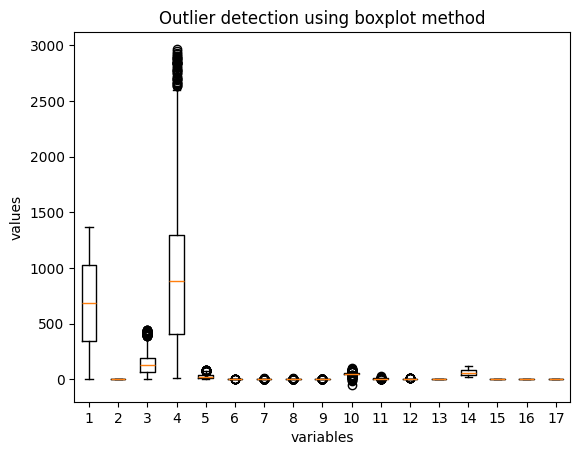

In [10]:
# Outlier detection
# box method
plt.boxplot(df)
plt.xlabel('variables')
plt.ylabel('values')
plt.title('Outlier detection using boxplot method')
plt.show()

In [11]:
# standardaization method(Z-score)
z_score = df.apply(zscore)
threshold = 3
outlier_mask = (np.abs(z_score) > threshold).any(axis=1)
outliers = df[outlier_mask]
df_clean = df[~outlier_mask]
print(df_clean)

      text_content  content_type  word_count  character_count  sentence_count  \
0              995             0       288.0           1927.0            54.0   
1              124             4       253.0           1719.0            45.0   
2             1301             0       420.0           2849.0            75.0   
3             1151             3       196.0           1310.0            34.0   
4              835             5       160.0           1115.0            28.0   
...            ...           ...         ...              ...             ...   
1362           227             0       251.0           1677.0            44.0   
1363           601             1        79.0            503.0            15.0   
1364          1220             7        15.0             94.0             3.0   
1365           869             2        92.0            578.0            14.0   
1366           108             2       192.0           1270.0            34.0   

      lexical_diversity  av

In [12]:
# IsolationForest method
clf = IsolationForest(n_estimators = 100, contamination = 0.1, random_state = 42)
clf.fit(df)
prediction = clf.predict(df)
scores = clf.decision_function(df)
print(scores)
print(prediction)
outliers = df[prediction == -1]
inlier = df[prediction == 1]
print('Inlier raw')
print(inlier)

/home/melaku/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[ 0.05148113  0.04530727 -0.0423078  ...  0.0246917   0.03161738
  0.06014462]
[ 1  1 -1 ...  1  1  1]
Inlier raw
      text_content  content_type  word_count  character_count  sentence_count  \
0              995             0       288.0           1927.0            54.0   
1              124             4       253.0           1719.0            45.0   
3             1151             3       196.0           1310.0            34.0   
4              835             5       160.0           1115.0            28.0   
5             1115             2       198.0           1383.0            37.0   
...            ...           ...         ...              ...             ...   
1362           227             0       251.0           1677.0            44.0   
1363           601             1        79.0            503.0            15.0   
1364          1220             7        15.0             94.0             3.0   
1365           869             2        92.0            578.0            14.

In [13]:
# Inter quartiel Range
outlier_counts = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
print(lower)
print(upper)

print(pd.Series(outlier_counts))

-1.5
2.5
Series([], dtype: float64)


/tmp/ipykernel_4456/331410537.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(pd.Series(outlier_counts))


# Feature Scalling

In [14]:
# Absolute maximum value
Absolute_max = df.max()
print(Absolute_max)

text_content            1366.0000
content_type               7.0000
word_count               443.0000
character_count         2966.0000
sentence_count            83.0000
lexical_diversity          1.0000
avg_sentence_length        8.0000
avg_word_length            8.3300
punctuation_ratio          0.0714
flesch_reading_ease       98.8700
gunning_fog_index         27.8700
grammar_errors            10.0000
passive_voice_ratio        0.2500
predictability_score     119.9300
burstiness                 0.7995
sentiment_score            0.9959
label                      1.0000
dtype: float64


In [15]:
Absolute_max = df.max().max()
Absolute_max

2966.0

In [16]:
scalled_vals = (df - Absolute_max)/Absolute_max
print(scalled_vals)

      text_content  content_type  word_count  character_count  sentence_count  \
0        -0.664531     -1.000000   -0.902900        -0.350303       -0.981794   
1        -0.958193     -0.998651   -0.914700        -0.420432       -0.984828   
2        -0.561362     -1.000000   -0.858395        -0.039447       -0.974713   
3        -0.611935     -0.998989   -0.933918        -0.558328       -0.988537   
4        -0.718476     -0.998314   -0.946055        -0.624073       -0.990560   
...            ...           ...         ...              ...             ...   
1362     -0.923466     -1.000000   -0.915374        -0.434592       -0.985165   
1363     -0.797370     -0.999663   -0.973365        -0.830411       -0.994943   
1364     -0.588672     -0.997640   -0.994943        -0.968307       -0.998989   
1365     -0.707013     -0.999326   -0.968982        -0.805125       -0.995280   
1366     -0.963587     -0.999326   -0.935266        -0.571814       -0.988537   

      lexical_diversity  av

In [17]:
# Min-Max-Scalling
min_val = df.min()
max_val = df.max()
print(min_val , max_val)

text_content             0.0000
content_type             0.0000
word_count               3.0000
character_count         14.0000
sentence_count           1.0000
lexical_diversity        0.8750
avg_sentence_length      3.0000
avg_word_length          4.0000
punctuation_ratio        0.0194
flesch_reading_ease    -50.0100
gunning_fog_index        1.2000
grammar_errors           0.0000
passive_voice_ratio      0.0500
predictability_score    20.0300
burstiness               0.1011
sentiment_score         -0.9993
label                    0.0000
dtype: float64 text_content            1366.0000
content_type               7.0000
word_count               443.0000
character_count         2966.0000
sentence_count            83.0000
lexical_diversity          1.0000
avg_sentence_length        8.0000
avg_word_length            8.3300
punctuation_ratio          0.0714
flesch_reading_ease       98.8700
gunning_fog_index         27.8700
grammar_errors            10.0000
passive_voice_ratio        0.2500

In [18]:
Min_Max_scaling = (df-min_val)/(max_val-min_val)
Min_Max_scaling.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,0.728404,0.000000,0.647727,0.648035,0.646341,0.6112,0.466,0.390300,0.165385,0.692437,0.232846,0.1,0.2705,0.859159,0.647194,0.602797,1.0
1,0.090776,0.571429,0.568182,0.577575,0.536585,0.7784,0.524,0.415704,0.130769,0.673898,0.258718,0.6,0.7725,0.803403,0.663230,0.744136,1.0
2,0.952416,0.000000,0.947727,0.960366,0.902439,0.2568,0.520,0.413395,0.132692,0.650658,0.249719,0.5,0.9040,0.769269,0.568156,0.382117,1.0
3,0.842606,0.428571,0.438636,0.439024,0.402439,0.6736,0.552,0.390300,0.126923,0.697273,0.217473,0.2,0.7060,0.688288,0.748855,0.496844,1.0
4,0.611274,0.714286,0.356818,0.372967,0.329268,0.7504,0.542,0.454965,0.109615,0.635008,0.265842,0.0,0.4090,0.061261,0.269616,0.496844,1.0


In [19]:
# or from sklearn.preprocessing we can import MinMaxScaler
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df)
scaler_df = pd.DataFrame(scaler_data, columns = df.columns)
scaler_df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,0.728404,0.000000,0.647727,0.648035,0.646341,0.6112,0.466,0.390300,0.165385,0.692437,0.232846,0.1,0.2705,0.859159,0.647194,0.602797,1.0
1,0.090776,0.571429,0.568182,0.577575,0.536585,0.7784,0.524,0.415704,0.130769,0.673898,0.258718,0.6,0.7725,0.803403,0.663230,0.744136,1.0
2,0.952416,0.000000,0.947727,0.960366,0.902439,0.2568,0.520,0.413395,0.132692,0.650658,0.249719,0.5,0.9040,0.769269,0.568156,0.382117,1.0
3,0.842606,0.428571,0.438636,0.439024,0.402439,0.6736,0.552,0.390300,0.126923,0.697273,0.217473,0.2,0.7060,0.688288,0.748855,0.496844,1.0
4,0.611274,0.714286,0.356818,0.372967,0.329268,0.7504,0.542,0.454965,0.109615,0.635008,0.265842,0.0,0.4090,0.061261,0.269616,0.496844,1.0


In [20]:
# scaling with Standardization
mean = df.mean()
std = df.std()
z_score = (df - mean)/std
z_score.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,0.790347,-1.478808,1.517388,1.507898,1.588915,-0.618816,-0.349781,-0.099356,0.199898,0.088255,-0.079711,-0.281208,-0.821851,1.526419,0.632670,3.666228e-01,1.000366
1,-1.416039,0.274471,1.158083,1.190018,1.085206,0.177268,0.298696,0.294013,-0.442733,-0.183414,0.294758,2.333838,0.968115,1.329066,0.688881,8.556904e-01,1.000366
2,1.565495,-1.478808,2.872482,2.916962,2.764235,-2.306209,0.253973,0.258252,-0.407031,-0.523985,0.164508,1.810829,1.437001,1.208245,0.355629,-3.969817e-01,1.000366
3,1.185521,-0.163849,0.572928,0.564956,0.469563,-0.321713,0.611753,-0.099356,-0.514136,0.159126,-0.302222,0.241801,0.730998,0.921605,0.989009,6.017001e-18,1.000366
4,0.385041,0.712791,0.203357,0.266944,0.133757,0.043953,0.499947,0.901947,-0.835451,-0.753329,0.397873,-0.804218,-0.328006,-1.297819,-0.690802,6.017001e-18,1.000366


In [21]:
z_scale = Normalizer()
z_scale_data = z_scale.fit_transform(df)
z_scale_df = pd.DataFrame(z_scale_data, columns = df.columns)
z_scale_df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,0.453995,0.000000,0.131407,0.879244,0.024639,0.000434,0.002432,0.002596,0.000013,0.024219,0.003381,0.000456,0.000047,0.048301,0.000252,0.000093,0.000456
1,0.071012,0.002291,0.144888,0.984434,0.025771,0.000557,0.003218,0.003322,0.000015,0.028817,0.004639,0.003436,0.000117,0.057434,0.000323,0.000278,0.000573
2,0.411347,0.000000,0.132795,0.900790,0.023713,0.000287,0.001771,0.001831,0.000008,0.014816,0.002485,0.001581,0.000073,0.030631,0.000157,-0.000075,0.000316
3,0.654635,0.001706,0.111476,0.745066,0.019338,0.000546,0.003276,0.003236,0.000015,0.030599,0.003981,0.001138,0.000109,0.050500,0.000355,-0.000005,0.000569
4,0.594963,0.003563,0.114005,0.794472,0.019951,0.000690,0.004069,0.004254,0.000018,0.031729,0.005907,0.000000,0.000094,0.018633,0.000206,-0.000006,0.000713


# Data pereprocessing

In [22]:
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,995,0,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.08,7.41,1.0,0.1041,105.86,0.5531,0.203400,1.0
1,124,4,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.32,8.10,6.0,0.2045,100.29,0.5643,0.485400,1.0
2,1301,0,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.86,7.86,5.0,0.2308,96.88,0.4979,-0.236900,1.0
3,1151,3,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.80,7.00,2.0,0.1912,88.79,0.6241,-0.007997,1.0
4,835,5,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.53,8.29,0.0,0.1318,26.15,0.2894,-0.007997,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   int64  
 1   content_type          1367 non-null   int64  
 2   word_count            1367 non-null   float64
 3   character_count       1367 non-null   float64
 4   sentence_count        1367 non-null   float64
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1367 non-null   float64
 10  gunning_fog_index     1367 non-null   float64
 11  grammar_errors        1367 non-null   float64
 12  passive_voice_ratio   1367 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

In [24]:
df.describe()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1367.00000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,683.00000,3.373811,140.190929,940.329188,25.610095,0.967646,5.486423,5.717783,0.027440,52.183377,7.556877,1.537674,0.150198,62.779049,0.427041,-0.007997,0.499634
std,394.76322,2.281439,97.410218,654.335255,17.867480,0.026254,0.447202,0.279636,0.002801,10.159406,1.842606,1.912012,0.056090,28.223550,0.199249,0.576607,0.500183
min,0.00000,0.000000,3.000000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101100,-0.999300,0.000000
25%,341.50000,1.000000,61.500000,410.500000,11.000000,0.951550,5.270000,5.590000,0.026100,48.060000,6.650000,0.000000,0.100800,39.015000,0.250000,-0.500950,0.000000
50%,683.00000,3.000000,131.000000,882.000000,24.000000,0.969200,5.480000,5.710000,0.027200,52.183377,7.556877,1.000000,0.150198,56.820000,0.408500,-0.007997,0.000000
75%,1024.50000,5.000000,193.000000,1294.500000,35.000000,0.989100,5.700000,5.830000,0.028400,56.845000,8.380000,3.000000,0.199250,86.645000,0.594300,0.467850,1.000000
max,1366.00000,7.000000,443.000000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.799500,0.995900,1.000000


### Handling missing values 

In [25]:
num_col = df.select_dtypes(include = ['number']).columns
num_col

Index(['text_content', 'content_type', 'word_count', 'character_count',
       'sentence_count', 'lexical_diversity', 'avg_sentence_length',
       'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease',
       'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio',
       'predictability_score', 'burstiness', 'sentiment_score', 'label'],
      dtype='object')

In [39]:
cata_col = df.select_dtypes(include = ['object']).columns
cata_col

Index([], dtype='object')

In [40]:
# by using SimpleImputation for numerical data
imputer1 = SimpleImputer(strategy = 'mean')
df[num_col] = imputer1.fit_transform(df[num_col])
df.head()


,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,995.0,0.0,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.08,7.41,1.0,0.1041,105.86,0.5531,0.203400,1.0
1,124.0,4.0,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.32,8.10,6.0,0.2045,100.29,0.5643,0.485400,1.0
2,1301.0,0.0,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.86,7.86,5.0,0.2308,96.88,0.4979,-0.236900,1.0
3,1151.0,3.0,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.80,7.00,2.0,0.1912,88.79,0.6241,-0.007997,1.0
4,835.0,5.0,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.53,8.29,0.0,0.1318,26.15,0.2894,-0.007997,1.0


In [41]:
df.shape

(1367, 17)

In [42]:
df.isnull().sum()

text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64

## Outlier Detection

In [50]:
## now our data is clean
# by using isolation forest 
isolation_data = IsolationForest(n_estimators=100, contamination= 0.01, random_state= 42)
isolation_data.fit(df)
prediction = isolation_data.predict(df)
outliers = df[prediction == -1]
inliers = df[prediction == 1]
inliers.head()

/home/melaku/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,995.0,0.0,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.08,7.41,1.0,0.1041,105.86,0.5531,0.203400,1.0
1,124.0,4.0,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.32,8.10,6.0,0.2045,100.29,0.5643,0.485400,1.0
2,1301.0,0.0,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.86,7.86,5.0,0.2308,96.88,0.4979,-0.236900,1.0
3,1151.0,3.0,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.80,7.00,2.0,0.1912,88.79,0.6241,-0.007997,1.0
4,835.0,5.0,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.53,8.29,0.0,0.1318,26.15,0.2894,-0.007997,1.0


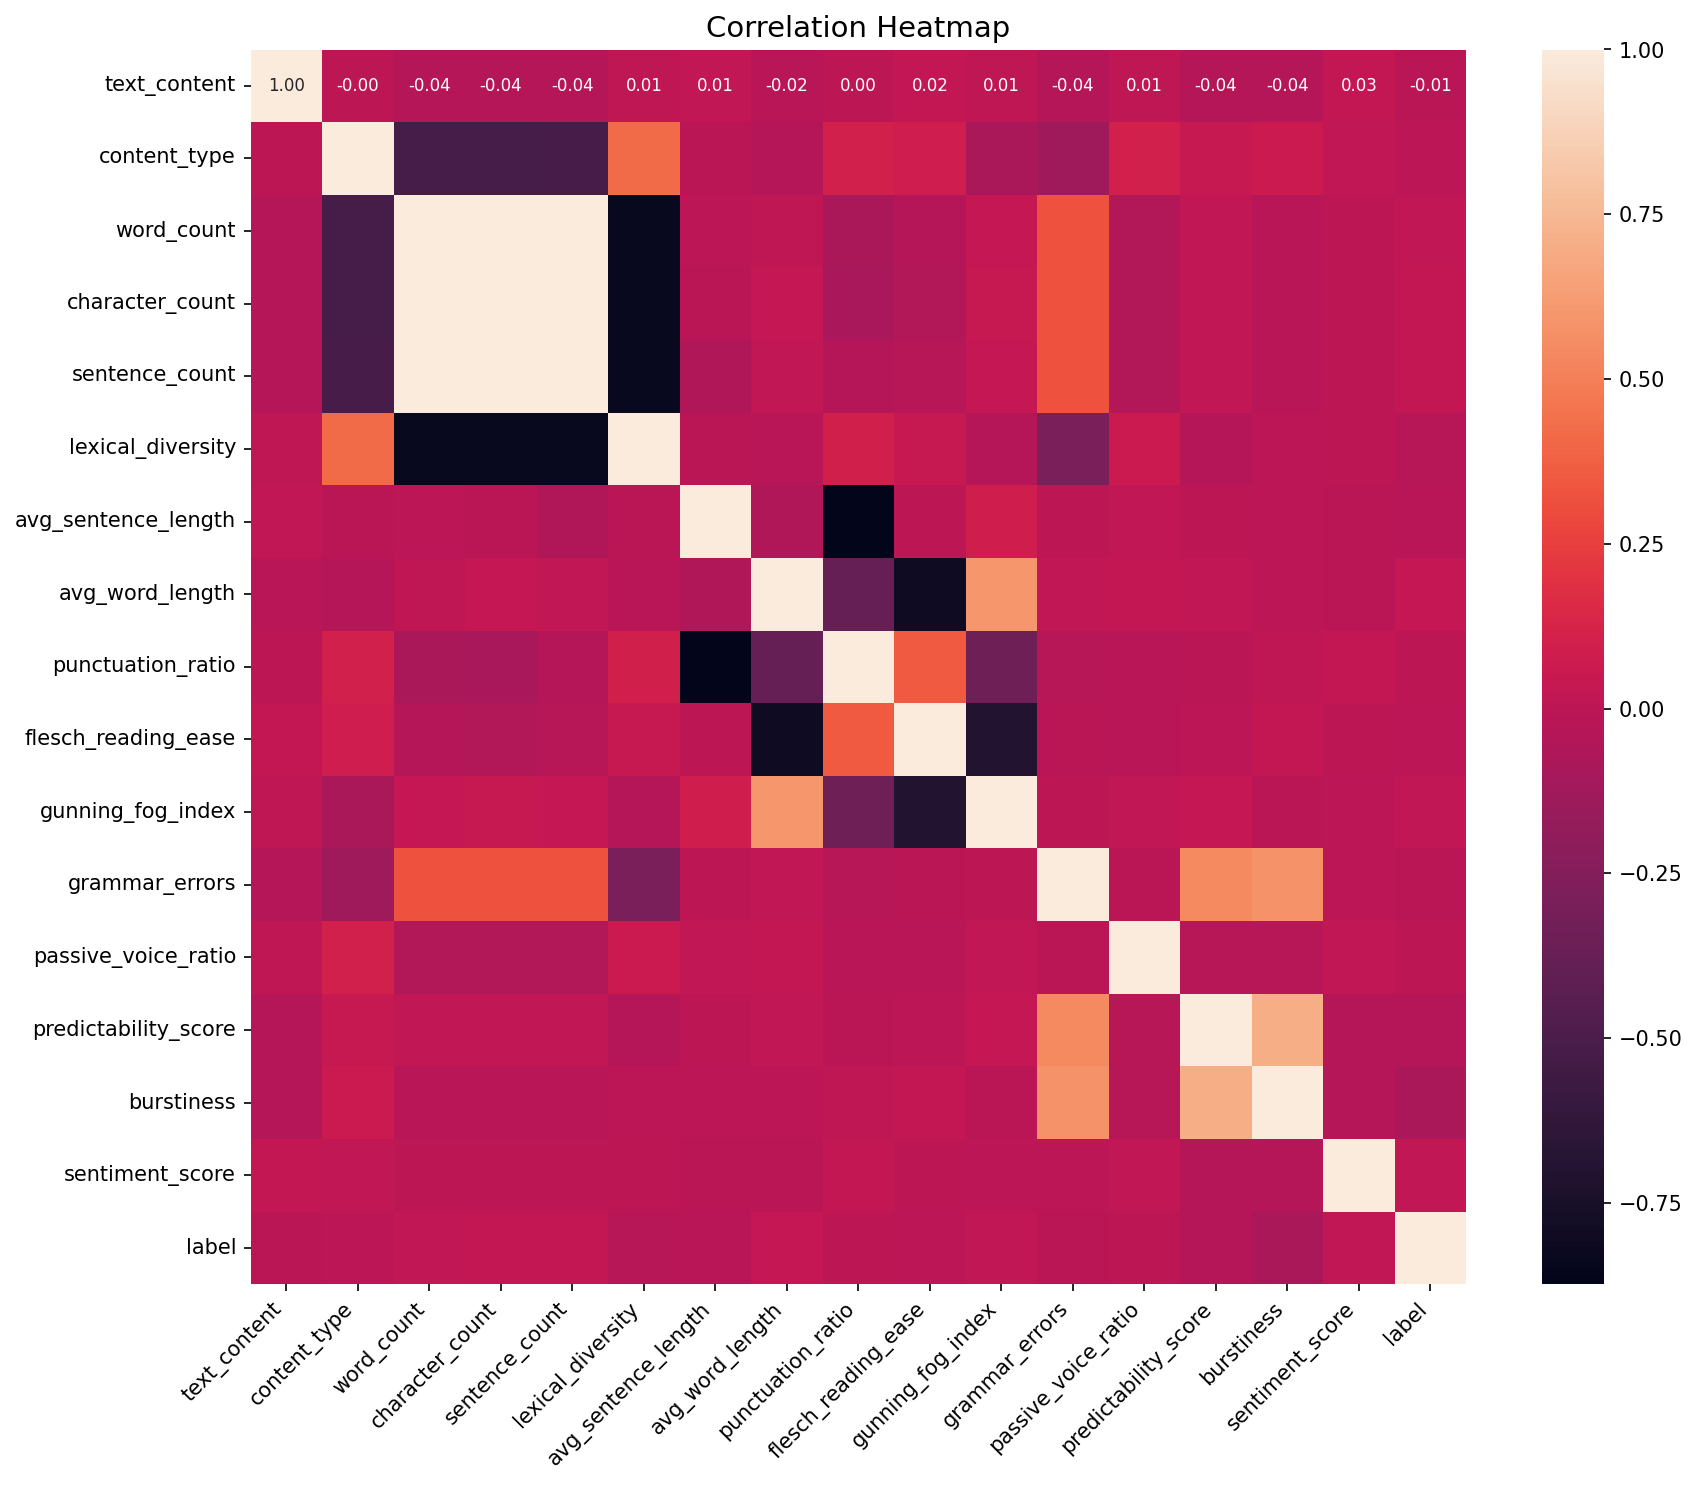

In [61]:
plt.figure(figsize=(12, 10), dpi=150)  # Wider figure size
corr_matrix = inliers.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
      # Better color contrast
    annot_kws={"size": 8},  # Smaller annotation text
)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()  # Avoid label cut-off
plt.show()

### Normalization

In [64]:
normal_data = Normalizer()
normalize_data = normal_data.fit_transform(inliers)
normalize_df = pd.DataFrame(normalize_data, columns = inliers.columns)
normalize_df

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,0.453995,0.000000,0.131407,0.879244,0.024639,0.000434,0.002432,0.002596,0.000013,0.024219,0.003381,0.000456,0.000047,0.048301,0.000252,0.000093,0.000456
1,0.071012,0.002291,0.144888,0.984434,0.025771,0.000557,0.003218,0.003322,0.000015,0.028817,0.004639,0.003436,0.000117,0.057434,0.000323,0.000278,0.000573
2,0.411347,0.000000,0.132795,0.900790,0.023713,0.000287,0.001771,0.001831,0.000008,0.014816,0.002485,0.001581,0.000073,0.030631,0.000157,-0.000075,0.000316
3,0.654635,0.001706,0.111476,0.745066,0.019338,0.000546,0.003276,0.003236,0.000015,0.030599,0.003981,0.001138,0.000109,0.050500,0.000355,-0.000005,0.000569
4,0.594963,0.003563,0.114005,0.794472,0.019951,0.000690,0.004069,0.004254,0.000018,0.031729,0.005907,0.000000,0.000094,0.018633,0.000206,-0.000006,0.000713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,0.132296,0.000000,0.146284,0.977361,0.025643,0.000567,0.003322,0.003316,0.000015,0.029560,0.004674,0.000000,0.000072,0.065490,0.000402,0.000141,0.000000
1349,0.753088,0.001253,0.098992,0.630288,0.018796,0.001205,0.006604,0.006741,0.000037,0.075346,0.007719,0.000000,0.000297,0.140042,0.000785,-0.001033,0.000000
1350,0.995557,0.005712,0.012240,0.076707,0.002448,0.000816,0.004080,0.004349,0.000026,0.042583,0.003811,0.000000,0.000106,0.030495,0.000178,0.000679,0.000000
1351,0.827070,0.001903,0.087561,0.550111,0.013324,0.000941,0.006253,0.005035,0.000023,0.058352,0.007052,0.000000,0.000181,0.044332,0.000110,0.000141,0.000000
